In [28]:
import numpy as np
from sklearn import model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

data = np.random.uniform(0, 1,(1000, 1))
noise = np.random.normal(size=(1000,))
x = data[:,:1]
y = 10.0*(data[:,0]) + noise
# split to train and test
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=42)

rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_full_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_full_trees)
print("RF with full trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

rf = RandomForestRegressor(n_estimators=1000, min_samples_leaf=200)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_pruned_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

RF with full trees, Train MSE: 0.1987211402376869 Test MSE: 1.3037524193792343
RF with pruned trees, Train MSE: 9.595990012173997 Test MSE: 8.838873547633245


In [25]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=42)

rf = RandomForestRegressor(n_estimators=1, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_full_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_full_trees)
print("RF with full trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

rf = RandomForestRegressor(n_estimators=1, min_samples_leaf=200)
rf.fit(X_train, y_train)
y_train_predicted = rf.predict(X_train)
y_test_predicted_pruned_trees = rf.predict(X_test)
mse_train = mean_squared_error(y_train, y_train_predicted)
mse_test = mean_squared_error(y_test, y_test_predicted_pruned_trees)
print("RF with pruned trees, Train MSE: {} Test MSE: {}".format(mse_train, mse_test))

RF with full trees, Train MSE: 0.7411201764609545 Test MSE: 1.7492143160413494
RF with pruned trees, Train MSE: 9.045029495856584 Test MSE: 8.776401624459167


In [26]:
min_samples_leaf_full_trees = 1
min_samples_leaf_pruned_trees = 200
num_trees_range = range(100, 1001, 100)

train_mse_full_trees = []
test_mse_full_trees = []

train_mse_pruned_trees = []
test_mse_pruned_trees = []

for num_trees in num_trees_range:
    # Модель с полными деревьями
    rf_full_trees = RandomForestRegressor(n_estimators=num_trees, min_samples_leaf=min_samples_leaf_full_trees)
    rf_full_trees.fit(X_train, y_train)
    y_train_predicted_full_trees = rf_full_trees.predict(X_train)
    y_test_predicted_full_trees = rf_full_trees.predict(X_test)
    mse_train_full_trees = mean_squared_error(y_train, y_train_predicted_full_trees)
    mse_test_full_trees = mean_squared_error(y_test, y_test_predicted_full_trees)
    train_mse_full_trees.append(mse_train_full_trees)
    test_mse_full_trees.append(mse_test_full_trees)

    # Модель с обрезанными деревьями
    rf_pruned_trees = RandomForestRegressor(n_estimators=num_trees, min_samples_leaf=min_samples_leaf_pruned_trees)
    rf_pruned_trees.fit(X_train, y_train)
    y_train_predicted_pruned_trees = rf_pruned_trees.predict(X_train)
    y_test_predicted_pruned_trees = rf_pruned_trees.predict(X_test)
    mse_train_pruned_trees = mean_squared_error(y_train, y_train_predicted_pruned_trees)
    mse_test_pruned_trees = mean_squared_error(y_test, y_test_predicted_pruned_trees)
    train_mse_pruned_trees.append(mse_train_pruned_trees)
    test_mse_pruned_trees.append(mse_test_pruned_trees)

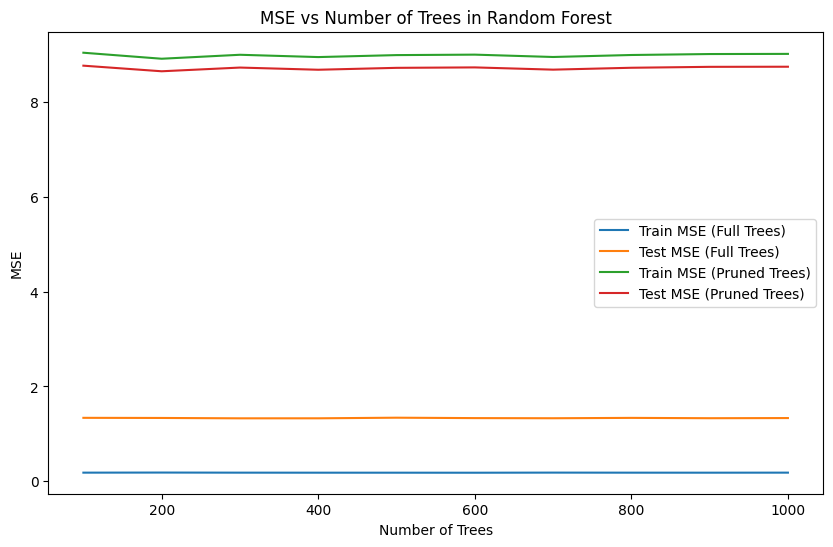

In [29]:
plt.figure(figsize=(10, 6))

plt.plot(num_trees_range, train_mse_full_trees, label='Train MSE (Full Trees)')
plt.plot(num_trees_range, test_mse_full_trees, label='Test MSE (Full Trees)')

plt.plot(num_trees_range, train_mse_pruned_trees, label='Train MSE (Pruned Trees)')
plt.plot(num_trees_range, test_mse_pruned_trees, label='Test MSE (Pruned Trees)')

plt.title('MSE vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

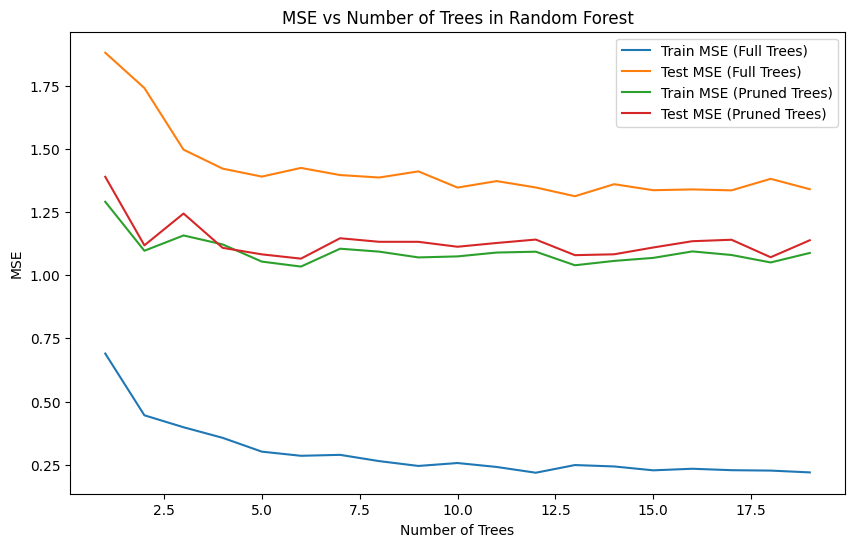

In [35]:
min_samples_leaf_full_trees = 1
min_samples_leaf_pruned_trees = 50
num_trees_range = range(1, 20, 1)

train_mse_full_trees = []
test_mse_full_trees = []

train_mse_pruned_trees = []
test_mse_pruned_trees = []

for num_trees in num_trees_range:
    # Модель с полными деревьями
    rf_full_trees = RandomForestRegressor(n_estimators=num_trees, min_samples_leaf=min_samples_leaf_full_trees)
    rf_full_trees.fit(X_train, y_train)
    y_train_predicted_full_trees = rf_full_trees.predict(X_train)
    y_test_predicted_full_trees = rf_full_trees.predict(X_test)
    mse_train_full_trees = mean_squared_error(y_train, y_train_predicted_full_trees)
    mse_test_full_trees = mean_squared_error(y_test, y_test_predicted_full_trees)
    train_mse_full_trees.append(mse_train_full_trees)
    test_mse_full_trees.append(mse_test_full_trees)

    # Модель с обрезанными деревьями
    rf_pruned_trees = RandomForestRegressor(n_estimators=num_trees, min_samples_leaf=min_samples_leaf_pruned_trees)
    rf_pruned_trees.fit(X_train, y_train)
    y_train_predicted_pruned_trees = rf_pruned_trees.predict(X_train)
    y_test_predicted_pruned_trees = rf_pruned_trees.predict(X_test)
    mse_train_pruned_trees = mean_squared_error(y_train, y_train_predicted_pruned_trees)
    mse_test_pruned_trees = mean_squared_error(y_test, y_test_predicted_pruned_trees)
    train_mse_pruned_trees.append(mse_train_pruned_trees)
    test_mse_pruned_trees.append(mse_test_pruned_trees)

plt.figure(figsize=(10, 6))

plt.plot(num_trees_range, train_mse_full_trees, label='Train MSE (Full Trees)')
plt.plot(num_trees_range, test_mse_full_trees, label='Test MSE (Full Trees)')

plt.plot(num_trees_range, train_mse_pruned_trees, label='Train MSE (Pruned Trees)')
plt.plot(num_trees_range, test_mse_pruned_trees, label='Test MSE (Pruned Trees)')

plt.title('MSE vs Number of Trees in Random Forest')
plt.xlabel('Number of Trees')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [43]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Генерация данных
X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=42)


# Обучение моделей
rf_pruned1 = RandomForestRegressor(n_estimators=1, min_samples_leaf=200, random_state=42)
rf_pruned2 = RandomForestRegressor(n_estimators=1, min_samples_leaf=200, random_state=42)
rf_pruned3 = RandomForestRegressor(n_estimators=2, min_samples_leaf=200, random_state=42)

rf_pruned1.fit(X_train, y_train)
rf_pruned2.fit(X_train, y_train)
rf_pruned3.fit(X_train, y_train)

# Предсказания от обрезанных моделей
y_pred_pruned1 = rf_pruned1.predict(X_test)
y_pred_pruned2 = rf_pruned2.predict(X_test)
y_pred_pruned3 = rf_pruned3.predict(X_test)

# Усредненные предсказания от обрезанных моделей
y_pred_pruned_avg = (y_pred_pruned1 + y_pred_pruned2) / 2.0

# Сравнение предсказаний
mse_y_test_vs_pruned3 = mean_squared_error(y_test, y_pred_pruned3)
mse_y_test_vs_pruned_avg = mean_squared_error(y_test, y_pred_pruned_avg)

print(f'MSE average of pruned models: {mse_y_test_vs_pruned3}')
print(f'MSE pruned model with 2 trees: {mse_y_test_vs_pruned_avg}')


MSE average of pruned models: 8.909207733350462
MSE pruned model with 2 trees: 8.915892520471823


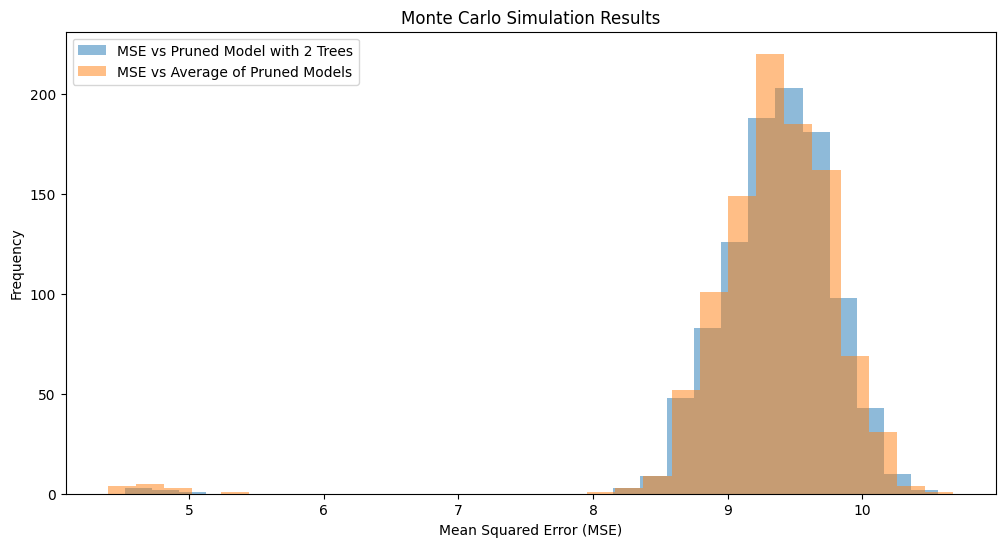

In [45]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Функция для проведения Монте-Карло симуляций
def monte_carlo_simulation(x, y, num_simulations=1000):
    mse_y_test_vs_pruned3_list = []
    mse_y_test_vs_pruned_avg_list = []

    for _ in range(num_simulations):
        # Разделение данных на обучающую и тестовую выборки
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=None)

        # Обучение моделей
        rf_pruned1 = RandomForestRegressor(n_estimators=1, min_samples_leaf=200, random_state=None)
        rf_pruned2 = RandomForestRegressor(n_estimators=1, min_samples_leaf=200, random_state=None)
        rf_pruned3 = RandomForestRegressor(n_estimators=2, min_samples_leaf=200, random_state=None)

        rf_pruned1.fit(X_train, y_train)
        rf_pruned2.fit(X_train, y_train)
        rf_pruned3.fit(X_train, y_train)

        # Предсказания от обрезанных моделей
        y_pred_pruned1 = rf_pruned1.predict(X_test)
        y_pred_pruned2 = rf_pruned2.predict(X_test)
        y_pred_pruned3 = rf_pruned3.predict(X_test)

        # Усредненные предсказания от обрезанных моделей
        y_pred_pruned_avg = (y_pred_pruned1 + y_pred_pruned2) / 2.0

        # Сравнение предсказаний
        mse_y_test_vs_pruned3 = mean_squared_error(y_test, y_pred_pruned3)
        mse_y_test_vs_pruned_avg = mean_squared_error(y_test, y_pred_pruned_avg)

        mse_y_test_vs_pruned3_list.append(mse_y_test_vs_pruned3)
        mse_y_test_vs_pruned_avg_list.append(mse_y_test_vs_pruned_avg)

    return mse_y_test_vs_pruned3_list, mse_y_test_vs_pruned_avg_list

# Проведение Монте-Карло симуляций
mse_y_test_vs_pruned3_simulations, mse_y_test_vs_pruned_avg_simulations = monte_carlo_simulation(x, y)

# Визуализация распределения
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.hist(mse_y_test_vs_pruned3_simulations, bins=30, alpha=0.5, label='MSE vs Pruned Model with 2 Trees')
plt.hist(mse_y_test_vs_pruned_avg_simulations, bins=30, alpha=0.5, label='MSE vs Average of Pruned Models')
plt.legend()
plt.title('Monte Carlo Simulation Results')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Frequency')
plt.show()
